<a href="https://colab.research.google.com/github/arnelGalit/Big_Data_Analytics/blob/main/Galit_PUP_Introduction_to_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn
## Galit, Arnel M.
## BSCpE 3-3 Big Data Analytics


### Import the seaborn and matplotlib libraries and load the Titanic dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

### Overview of the Titanic Dataset

In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### Running basic plot of the Titanic Dataset from the Activity given

### Basic Plots
#### Bar Plot

<function matplotlib.pyplot.show(close=None, block=None)>

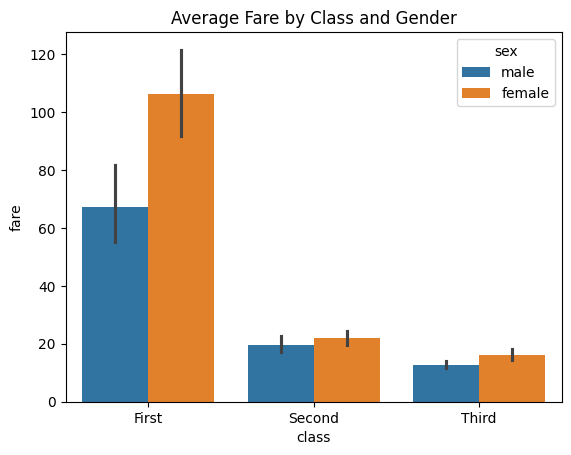

In [ ]:
sns.barplot(x='class', y= 'fare', hue = 'sex', data = titanic)
sns.countplot(x =)
plt.title('Average Fare by Class and Gender')
plt.show

#### Scatter Plot

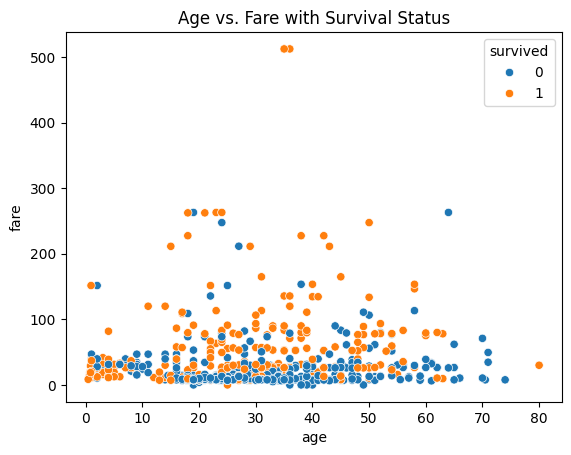

In [ ]:
sns.scatterplot (x="age", y="fare", data=titanic, hue="survived")
plt.title("Age vs. Fare with Survival Status")
plt.show()

#### Heat Map

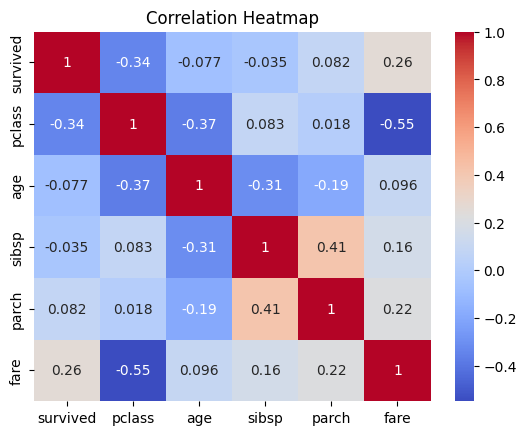

In [ ]:
correlation_matrix = titanic.select_dtypes(include=["number"]).corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Customization of the Plots

#### Bar Plot

<ipython-input-75-251a7eb469ff>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = titanic.groupby(['class', 'sex'])['fare'].mean().reset_index()


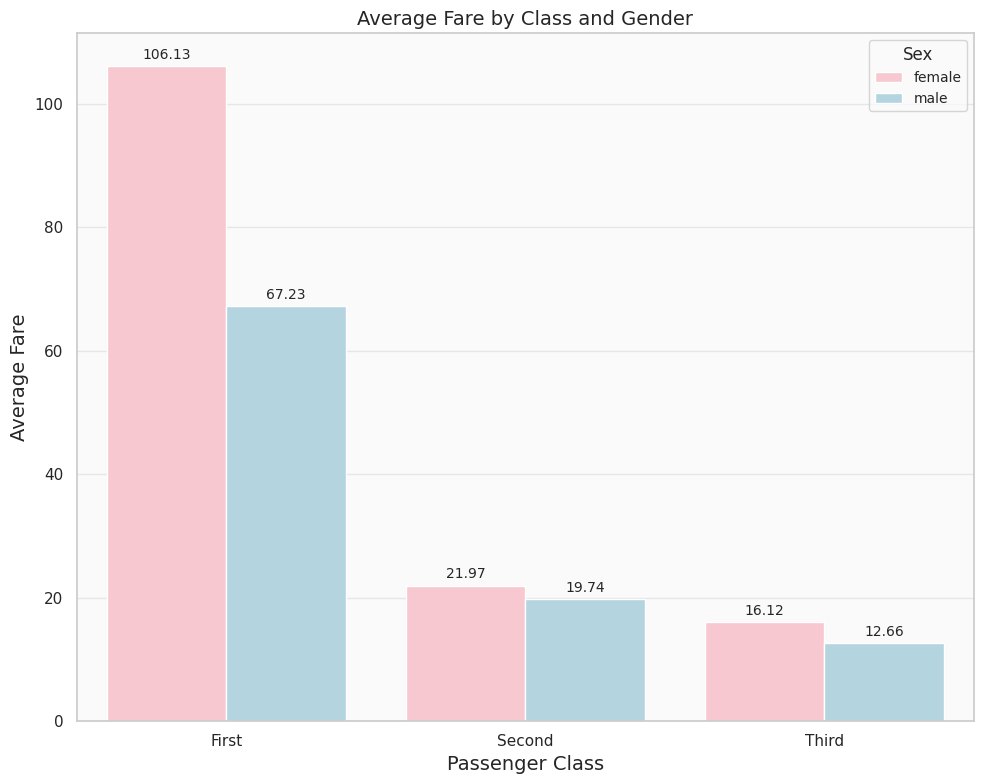

In [ ]:
sns.set_style("whitegrid", {"axes.facecolor": "#fafafa", "grid.color": ".9", "grid.linestyle": "-"})
plt.rcParams['font.family'] = 'sans-serif'

aggregated_data = titanic.groupby(['class', 'sex'])['fare'].mean().reset_index()
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='class', y='fare', hue='sex', data=aggregated_data, palette={'male': 'lightblue', 'female': 'pink'})

ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=3, fontsize=10)
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge', padding=3, fontsize=10)

plt.title('Average Fare by Class and Gender', fontsize=14)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Average Fare", fontsize=14)
plt.legend(title="Sex", fontsize=10)

plt.tight_layout()
plt.show()

#### Scatter Plot

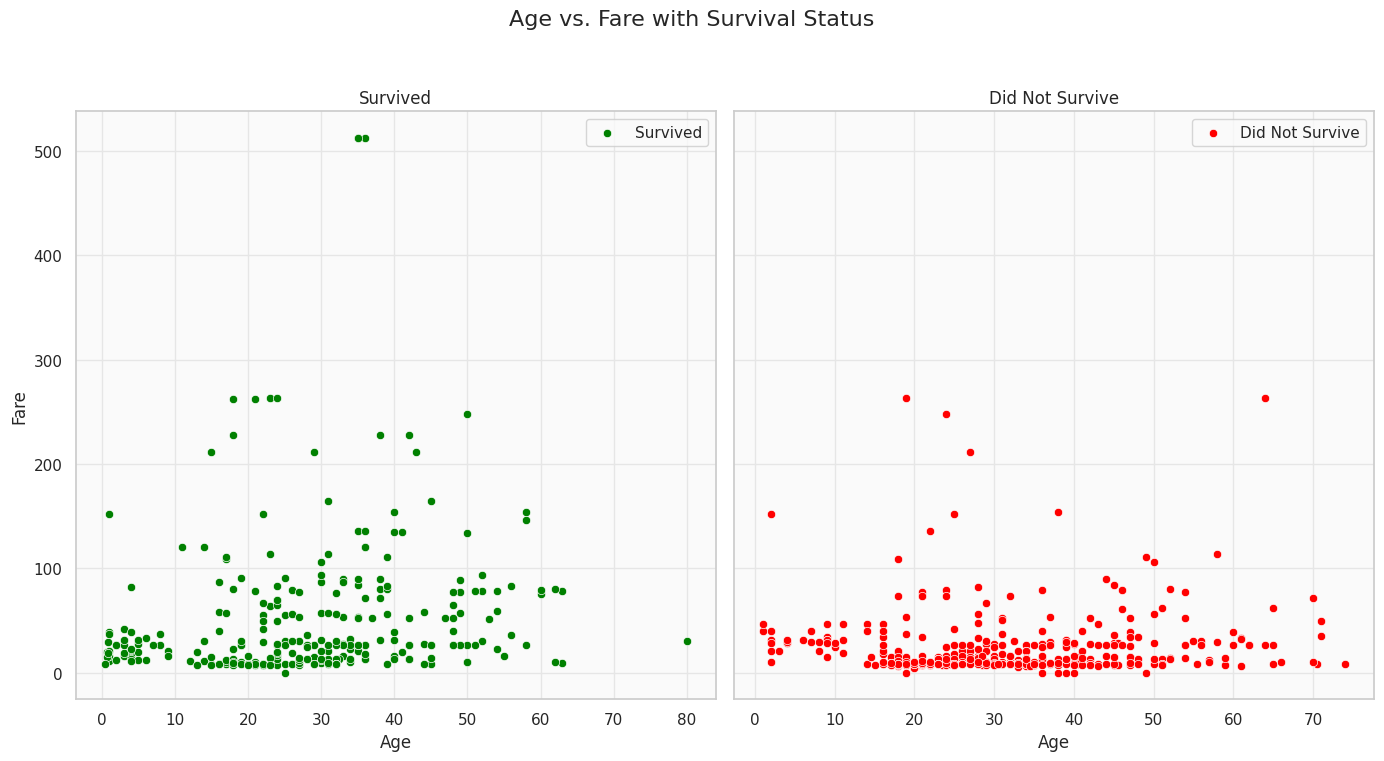

In [ ]:
sns.set_style("whitegrid", {"axes.facecolor": "#FAFAFA", "grid.color": ".9", "grid.linestyle": "-"})
plt.rcParams['font.family'] = 'sans-serif'
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

survived_data = titanic[titanic['survived'] == 1]
sns.scatterplot(x="age", y="fare", data=survived_data, color="green", ax=axes[0], label="Survived")
axes[0].set_title("Survived")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Fare")
axes[0].legend()

not_survived_data = titanic[titanic['survived'] == 0]
sns.scatterplot(x="age", y="fare", data=not_survived_data, color="red", ax=axes[1], label="Did Not Survive")
axes[1].set_title("Did Not Survive")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("")
axes[1].legend()

fig.suptitle("Age vs. Fare with Survival Status", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Heatmap

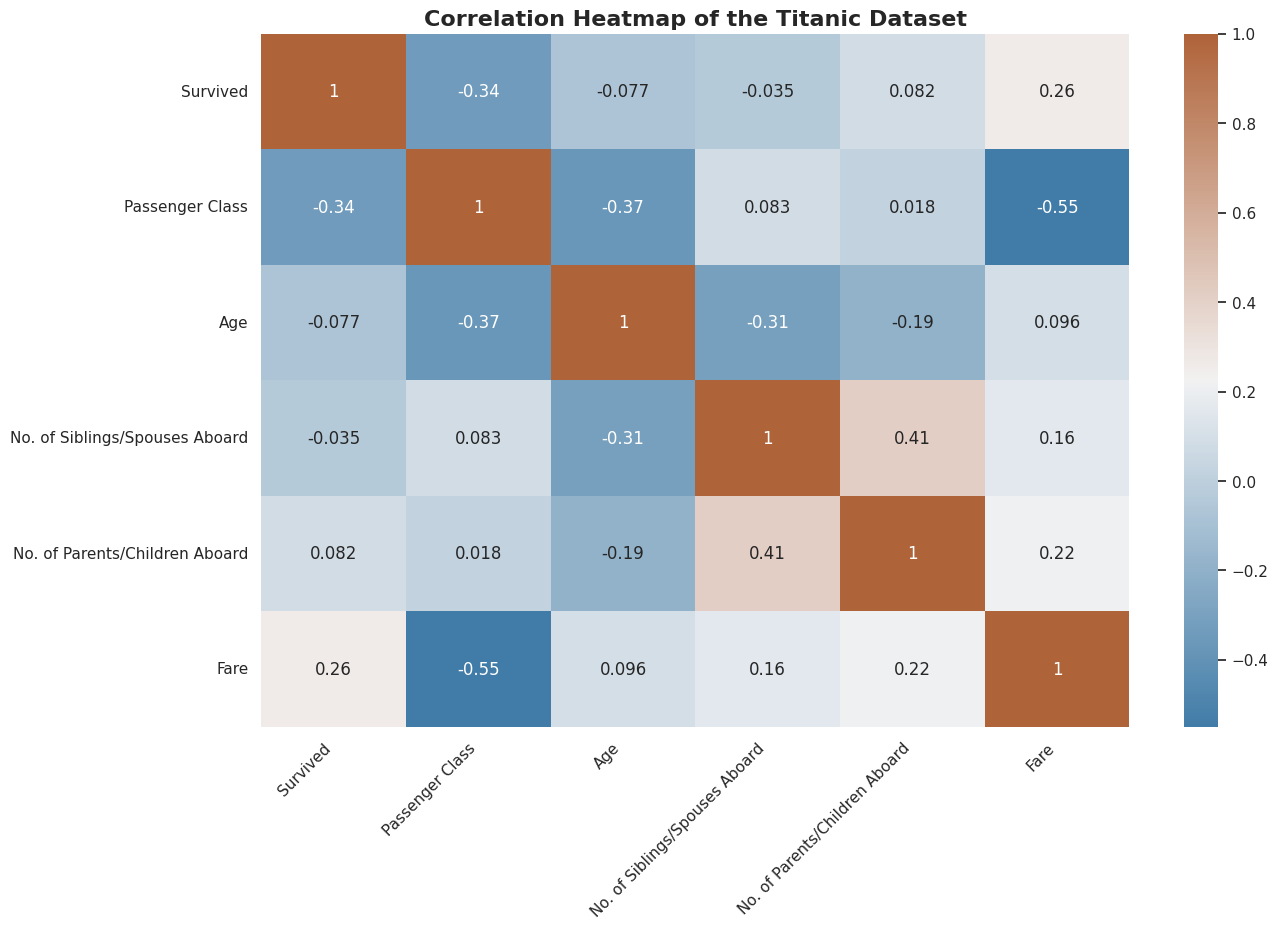

In [ ]:
#   Heatmap

titanic = sns.load_dataset("titanic")
correlation_matrix = titanic.select_dtypes(include=["number"]).corr()
correlation_matrix.rename(columns={
    'survived': 'Survived',
    'pclass': 'Passenger Class',
    'age': 'Age',
    'sibsp': 'No. of Siblings/Spouses Aboard',
    'parch': 'No. of Parents/Children Aboard',
    'fare': 'Fare'
}, inplace=True)
correlation_matrix.rename(index={
    'survived': 'Survived',
    'pclass': 'Passenger Class',
    'age': 'Age',
    'sibsp': 'No. of Siblings/Spouses Aboard',
    'parch': 'No. of Parents/Children Aboard',
    'fare': 'Fare'
}, inplace=True)
cmap = sns.diverging_palette(240, 30, as_cmap=True)
plt.figure(figsize=(14, 9))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

plt.title("Correlation Heatmap of the Titanic Dataset", fontsize = 16, weight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()